In [1]:
import msprime, tskit
import numpy as np

Find the TSKTI API [here](https://tskit.dev/tskit/docs/stable/python-api.html)
Find the Numpy API [here](https://numpy.org/doc/stable/reference/index.html#reference)

The Numpy reference is HUGE so get an idea for what to look up by Googling.

[How to save and load arrays](https://numpy.org/numpy-tutorials/save-load-arrays/), [Possibly helpful article on Reticulate](https://rstudio.github.io/reticulate/articles/arrays.html#reticulate-with-care)


Pipeline:

1. Simulate
2. Simplify
3. Extend
4. Find unary nodes
5. Save tree sequence, simplified tree sequence, simplified-extended ts, and unary vector

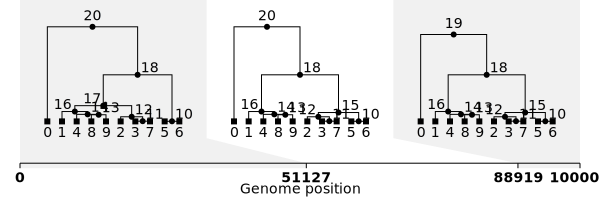

In [9]:
ts = msprime.sim_ancestry(5, sequence_length=1e5, recombination_rate=1e-6)
ts.draw_svg()

In [24]:
unary_nodes = np.zeros(ts.num_nodes) # binary vector specifying if a node is unary or not anywhere on the tree sequence
for tree in ts.trees():
    num_children = tree.num_children_array[:ts.num_nodes]
    # print(num_children)
    is_unary = num_children == 1
    for i, condition in enumerate(is_unary):
        if condition is True:
            unary_nodes[i] = 1
unary_nodes

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [ ]:
## How to make a mask
a = np.arange(5)
mask = a < 3
mask, a[mask]